El objetivo de este notebook es para hacer un prgrama que nos diga cuanto debemos ahorar para llegar a cierta meta de retiro

La premisa es, miestras estemos en nuestra vida laboral permaneceramos inviertiendo un porcentaje de nuestro fondo en dueda del gobierno (cetes) y el otro porcentaje en la bolsa mexicana de valores.

Para hacer los calculos necesitamos saber dos cosas, los intereses de los cetes la inflacion y los intereses de la bolsa.
Siguiendo el razonamiento como esta descrito en Investing Desm.... capitulo 10.
Tenemos que averiguar cuales son los rendimientos reales de cetes y del IPC.

In [3]:
import pandas as pd
import io
import requests
import io
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Para averiguar el de cetes tomaremos la inflacion y los rendimientos historicos de cetes
post_infla = {'formatoCSV.x': '44',
             'series': 'SP30577',
             'version': '2'}
url = 'http://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarSeries'
inflacion_cont = '\n'.join(requests.post(url, data=post_infla).content.split('\n')[12:])
inflacion_data =pd.read_csv(io.StringIO(inflacion_cont.decode('utf-8')), names=['fecha', 'inflacion'], na_values='N/E')
inflacion_data['fecha'] = inflacion_data.fecha.map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
inflacion_data.set_index('fecha', inplace=True)
inflacion_data['inflacion'] = inflacion_data.inflacion.astype(float)


In [50]:
# Cargando los redimientos de cetes
post_cetes = {'formatoCSV.x': '57',
             'series': 'SF43936',
             'version': '2'}
cetes_cont = '\n'.join(requests.post(url, data=post_cetes).content.split('\n')[12:])
cetes_data =pd.read_csv(io.StringIO(cetes_cont.decode('utf-8')), names=['fecha', 'cetes'], na_values='N/E')
cetes_data['fecha'] = cetes_data.fecha.map(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
cetes_data = cetes_data.loc[cetes_data.fecha > datetime.date(1999, 12, 31)]
cetes_data.set_index('fecha', inplace=True)
cetes_data['cetes'] = cetes_data.cetes.astype(float) * 0.84

In [5]:
inflacion_data = inflacion_data.resample('MS').mean()

In [51]:
cetes_data = cetes_data.resample('MS').mean()

In [52]:
result = inflacion_data.merge(cetes_data, left_index=True, right_index=True, how='inner')

In [53]:
result['cetes_real'] = result['cetes']/12-result['inflacion']

In [54]:
result['cetes_real'].describe()


count    209.000000
mean       0.088586
std        0.379401
min       -1.291900
25%       -0.167740
50%        0.053500
75%        0.324200
max        1.283975
Name: cetes_real, dtype: float64

Is this real life, nooooo god noooooooooooooo!

In [55]:
plot_me = result[['cetes']]/12
plot_me['inflacion'] = result.inflacion

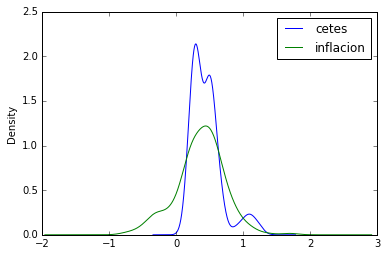

In [56]:
plot_me.plot(kind='kde')

In [57]:
plot_me.describe()

,cetes,inflacion
count,209.000000,209.000000
mean,0.453035,0.364450
std,0.230207,0.359922
min,0.187075,-0.740000
25%,0.294350,0.170000
50%,0.423220,0.400000
75%,0.520940,0.580000
max,1.251950,1.700000


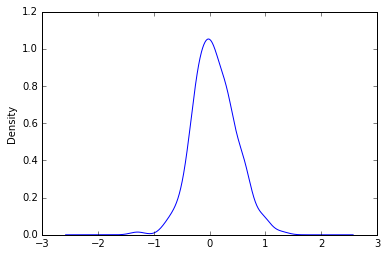

In [58]:
result.cetes_real.plot(kind='kde')

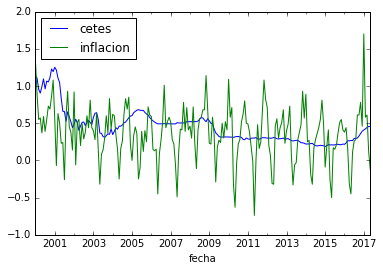

In [59]:
plot_me.plot()

Veamos con el IPC

In [60]:
plot_me.tail(20)

,cetes,inflacion
fecha,,
2015-10-01,0.211260,0.51
2015-11-01,0.211050,0.55
2015-12-01,0.219940,0.41
2016-01-01,0.215775,0.38
2016-02-01,0.235200,0.44
2016-03-01,0.266000,0.15
2016-04-01,0.261975,-0.32
2016-05-01,0.266875,-0.45
2016-06-01,0.266420,0.11


In [17]:
# Cargando los redimientos de cetes
ipc_cetes = {'formatoCSV.x': '74',
             'series': 'SF4782',
             'version': '2',
             'tipoInformacion': '4,2'}
ipc_cont = '\n'.join(requests.post(url, data=ipc_cetes).content.split('\n')[12:])
ipc_data =pd.read_csv(io.StringIO(ipc_cont.decode('utf-8')), names=['fecha', 'ipc'], na_values='N/E')
ipc_data['fecha'] = ipc_data.fecha.map(lambda x: datetime.strptime(x, '%d/%m/%Y'))
ipc_data.set_index('fecha', inplace=True)
ipc_data['ipc'] = ipc_data.ipc.astype(float)

In [18]:
ipc_data.describe()

,ipc
count,436.000000
mean,2.915161
std,10.070833
min,-43.190000
25%,-2.522500
50%,1.845000
75%,7.657500
max,43.670000


In [19]:
result['ipc_real'] = ipc_data.ipc - result.inflacion

In [25]:
ipc_result = ipc_data.merge(inflacion_data, left_index=True, right_index=True, how='inner')

In [26]:
ipc_result.head()

,ipc,inflacion
fecha,,
1981-01-01,NaN,3.22
1981-02-01,-4.76,2.46
1981-03-01,-4.29,2.14
1981-04-01,-1.49,2.26
1981-05-01,-7.58,1.51


In [29]:
ipc_result['ipc_real'] = ipc_result.ipc - ipc_result.inflacion
ipc_result.ipc_real.describe()

count    436.000000
mean       1.207683
std        9.722938
min      -51.120000
25%       -3.585000
50%        1.010000
75%        6.057500
max       35.330000
Name: ipc_real, dtype: float64

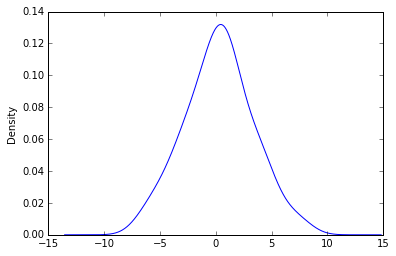

In [21]:
result.ipc_real.plot(kind='kde')

Just playing

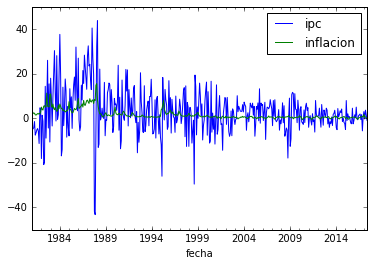

In [31]:
ipc_result[['ipc', 'inflacion']].plot()

Ahora veamos que onda con las afores
http://www.consar.gob.mx/gobmx/aplicativo/siset/Series.aspx?cd=147&cdAlt=False
http://www.consar.gob.mx/gobmx/aplicativo/siset/Enlace.aspx?md=18

In [1]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [6]:
hey = pd.read_csv('../files/afores.csv')

In [12]:
import time
time.strptime('jul-03', '%b-%YY')

ValueError: time data 'jul-03' does not match format '%b-%YY'

In [11]:
hey['fecha'] = hey.fecha.map(lambda x: datetime.datetime.strptime(x, '%b-%Y'))

ValueError: time data 'jul-98' does not match format '%b-%Y'